# PARTICIPANTE: VICTOR ARMANDO JARAMILLO MORENO

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.datasets import load_iris,load_digits
from sklearn.decomposition import PCA

In [26]:
movies = pd.read_csv('Peliculas_descripcion.txt',sep='|',header=None)
df = pd.read_csv('Peliculas_Clientes_Evaluaciones.txt',sep="\t",header=None)
column_names = ["c1", "c2", "c3","c4"]
df.columns = column_names 
df["c3"] = df["c3"] - 3
matriz_evaluaciones = df.pivot(index='c2', columns='c1', values='c3')
matriz_evaluaciones

c1,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
c2,,,,,,,,,,,,,,,,,,,,,
1,2.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,...,-1.0,0.0,1.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN
2,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN
5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
top_peliculas = matriz_evaluaciones.isna().sum(axis=1).nsmallest(50).index
print(top_peliculas.values)
top_clientes = matriz_evaluaciones.isna().sum(axis=0).nsmallest(100).index

matriz_filtrada = matriz_evaluaciones.loc[top_peliculas,top_clientes]
matriz_filtrada = matriz_filtrada.fillna(0)
labels = np.array(movies[1][top_peliculas.values-1].values)
for i in range(len(labels)):
  labels[i] = labels[i][:10]
print(labels)

[ 50 258 100 181 294 286 288   1 300 121 174 127  56   7  98 237 117 172
 222 204 313 405  79 210 151 173  69 168 748 269 257 195 423   9 276 318
  22 302  96 328  15  25 118 183 216 176  64 202 234  28]
['Star Wars ' 'Contact (1' 'Fargo (199' 'Return of ' 'Liar Liar '
 'English Pa' 'Scream (19' 'Toy Story ' 'Air Force ' 'Independen'
 'Raiders of' 'Godfather,' 'Pulp Ficti' 'Twelve Mon' 'Silence of'
 'Jerry Magu' 'Rock, The ' 'Empire Str' 'Star Trek:' 'Back to th'
 'Titanic (1' 'Mission: I' 'Fugitive, ' 'Indiana Jo' 'Willy Wonk'
 'Princess B' 'Forrest Gu' 'Monty Pyth' 'Saint, The' 'Full Monty'
 'Men in Bla' 'Terminator' 'E.T. the E' 'Dead Man W' 'Leaving La'
 "Schindler'" 'Braveheart' 'L.A. Confi' 'Terminator' 'Conspiracy'
 'Mr. Hollan' 'Birdcage, ' 'Twister (1' 'Alien (197' 'When Harry'
 'Aliens (19' 'Shawshank ' 'Groundhog ' 'Jaws (1975' 'Apollo 13 ']


In [28]:
pca = PCA()
X_pca = pca.fit_transform(matriz_filtrada)
X_pca.shape

(50, 50)

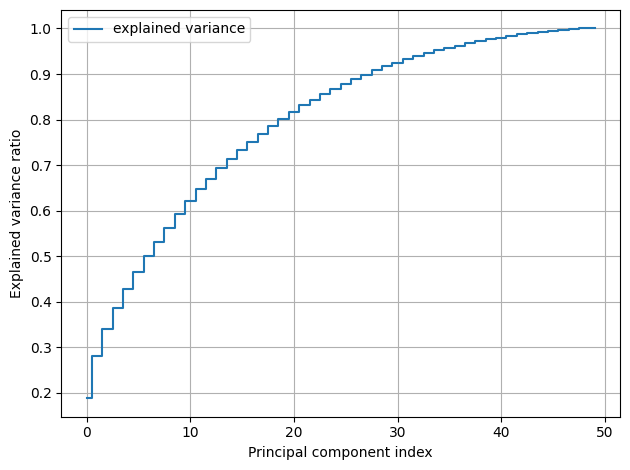

In [29]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

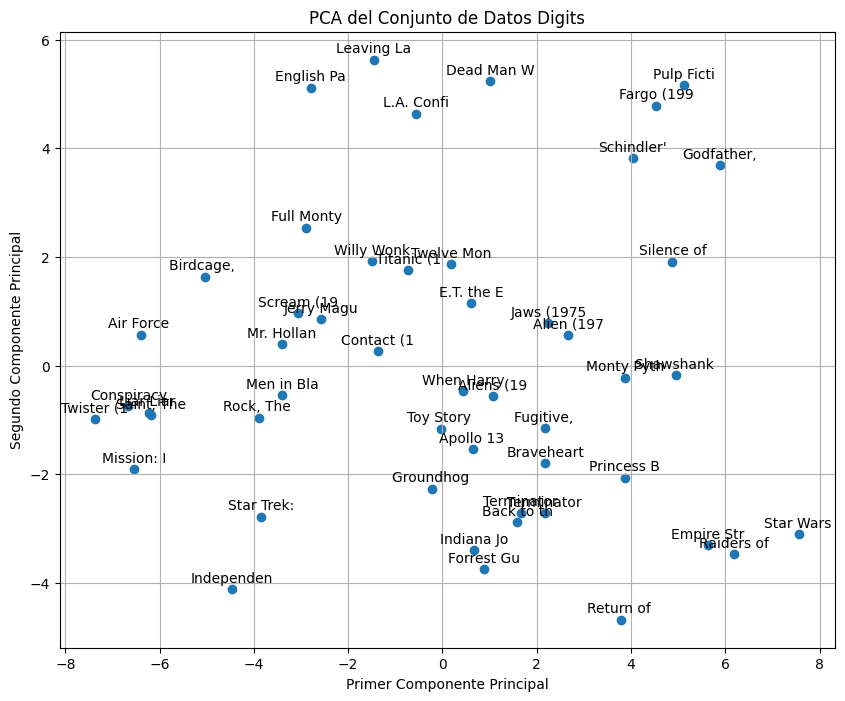

Varianza explicada por el primer componente: 18.83%
Varianza explicada por el segundo componente: 9.19%


In [30]:

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],label='Data points')
for i, label in enumerate(labels):
    plt.annotate(label, (X_pca[i,0], X_pca[i,1]),textcoords="offset points", xytext=(0, 5), ha='center')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('PCA del Conjunto de Datos Digits')
plt.grid()
plt.show()

print(f"Varianza explicada por el primer componente: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"Varianza explicada por el segundo componente: {pca.explained_variance_ratio_[1]*100:.2f}%")